**Task:**

We are going to find disparity of two images and we are going to see the image in 3D space (using cloud compare).

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import itertools

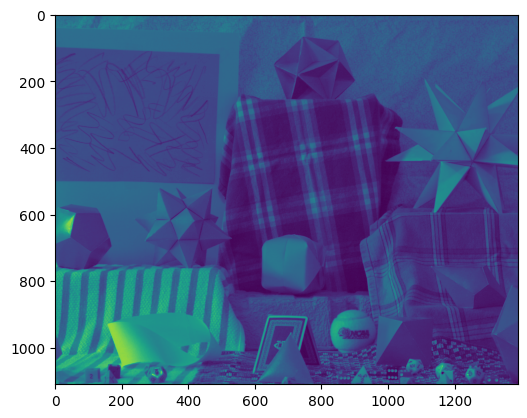

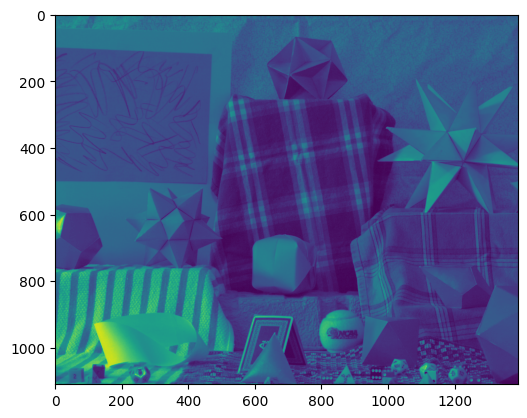

In [44]:
#loading two images

image_1 = cv2.imread("image_2_1.png", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("image_2_2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image_1)
plt.figure()
plt.imshow(image_2)

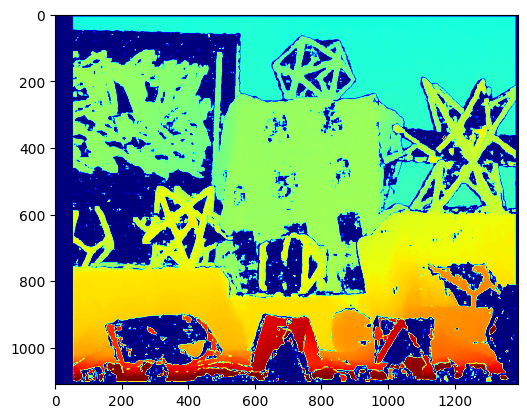

In [61]:
#calculating disparities and displaying the disparity image with a colormap

stereo = cv2.StereoBM.create(numDisparities=48, blockSize=15)
disparity = stereo.compute(image_1, image_2)

plt.imshow(disparity, cmap='jet')
plt.show()

nrows, ncols = disparity.shape
disparity = disparity.reshape(-1, nrows*ncols)

In [62]:
#Filtering the invalid disparity
#setting up row and column vectors

yx = list(itertools.product(range(nrows), range(ncols)))

x, y = list(zip(*yx))

x = np.array(x).reshape(-1, nrows*ncols)
y = np.array(y).reshape(-1, nrows*ncols)

#masking/filtering the disparities value greater than 0
mask = disparity > 0

disparity = disparity[mask] * 0.1
x = x[mask]
y = y[mask]

In [63]:
#converting the disparoty values into cloud points for 3D visualisation

baseline = 0.1
focal_length = 150

zw = (baseline * focal_length) / disparity

cx = nrows/2
cy = ncols/2

xw = (x-cx) * zw / focal_length
yw = (y-cy) * zw / focal_length

data = np.stack([-xw, yw, zw], axis=0).T
np.savetxt('point.asc', data)